In [3]:
import numpy as np
import ROOT
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [4]:
# read in file
import os
file_name = f"{os.environ.get('HEP')}/data/CC_gvkm/CC_gvkm_radiological_0201.root"
# file_name = f"{os.environ.get('HEP')}/data/marley_gvkm_clean_0114.root"
file = ROOT.TFile(file_name)
tree=file.PointResTree.tr

In [5]:
# loop through file
# define linear coefficients for energy reconstruction
def charge_to_energy_clean(charge):
    m = 259.218
    b = 901.312
    return (charge - b)/m
cosAngle_list = []
sample_size_per_bin = []
nbin_en = 7
e_max = 70
nbin_cosangle = 20
pdf = np.zeros([nbin_en, nbin_cosangle])
for e in tqdm(tree, total=tree.GetEntries()):
    if e.NTrks==0: continue
    en = charge_to_energy_clean(e.charge_corrected)
    if en > e_max: continue
    cosAngle = e.truth_nu_dir.Dot(e.reco_e_dir)
    en_binidx = int(en//(e_max/nbin_en))
    cosangle_binidx = int((cosAngle+1)//(2/nbin_cosangle))
    pdf[en_binidx, cosangle_binidx]+=1
# normalize pdf for each energy bin
for i in range(len(pdf)):
    energy_slice = pdf[i]
    sample_size_per_bin.append(np.sum(pdf[i]))
    pdf[i] = pdf[i] / np.sum(pdf[i])
# np.savetxt('ES_gvkm_radiological.dat', pdf)

100%|███████████████████████████████████████████████████████| 1007500/1007500 [00:37<00:00, 26541.50it/s]


Text(0, 0.5, '$e^-$ energy (MeV)')

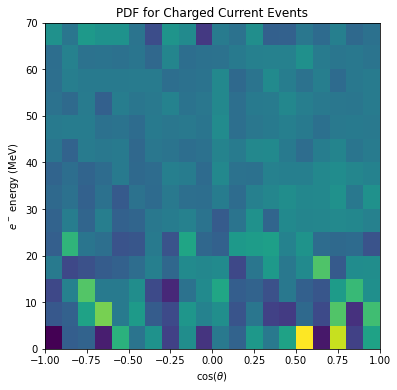

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(pdf, extent=[-1,1,0,e_max], aspect='auto')
ax.set_title("PDF for Charged Current Events")
ax.set_xlabel(r'$\cos(\theta)$')
ax.set_ylabel(r'$e^-$ energy (MeV)')

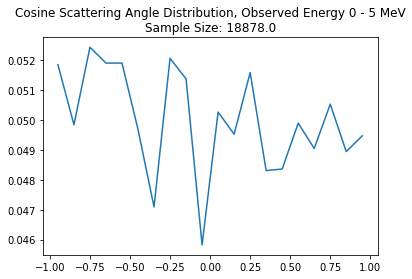

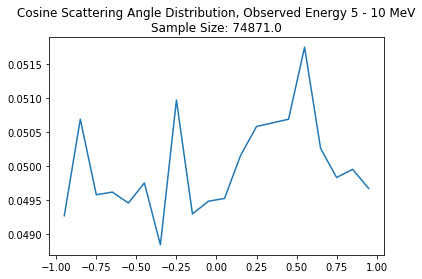

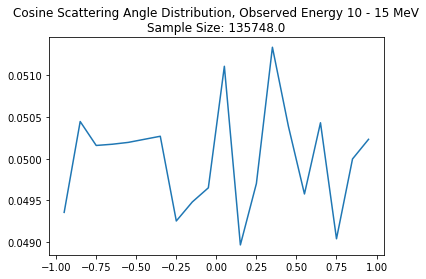

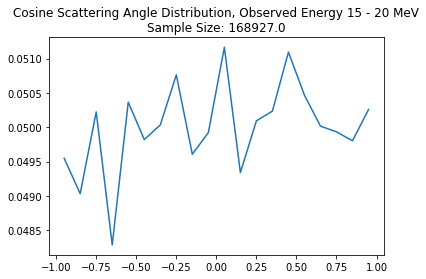

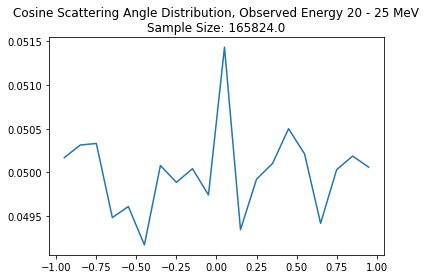

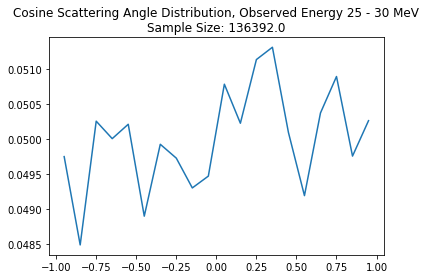

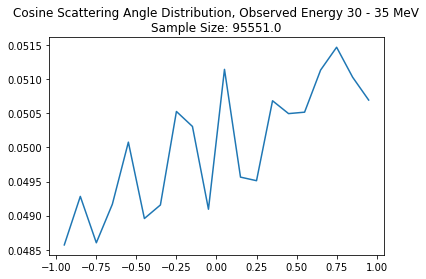

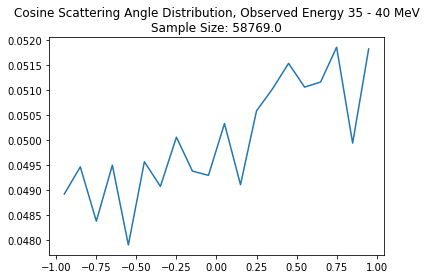

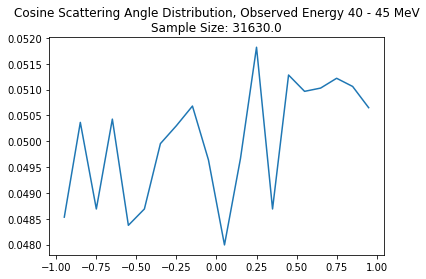

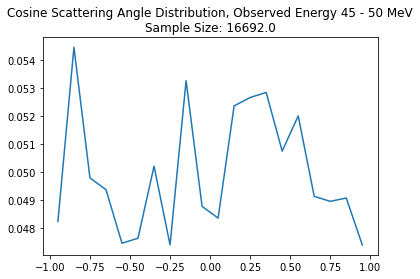

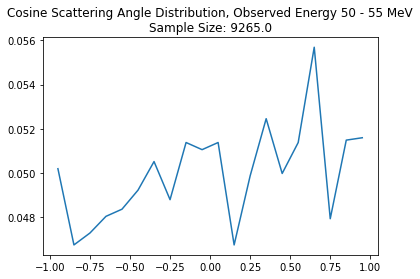

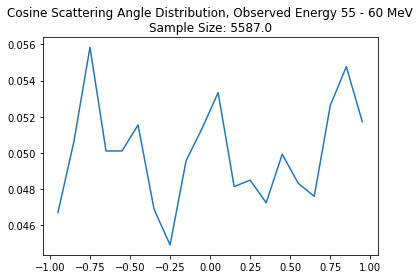

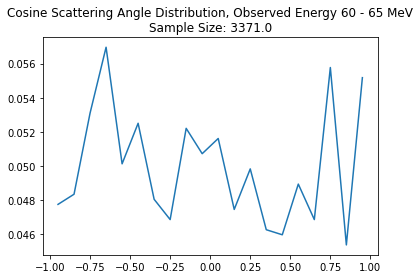

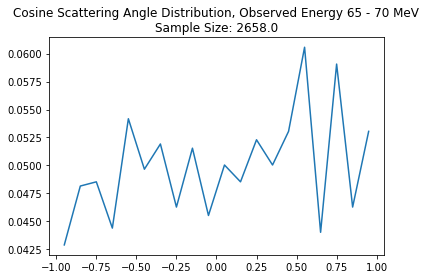

In [9]:
# energy slices
cosAngle_bins = np.linspace(-1, 1, num=20, endpoint=False) + 2/20/2
# print(cosAngle_bins)
for i, (pdf_slice, sample_size) in enumerate(zip(pdf, sample_size_per_bin)):
    plt.figure()
    plt.title(f"Cosine Scattering Angle Distribution, Observed Energy {i*5} - {(i+1)*5} MeV\n"\
            f"Sample Size: {sample_size}")
    plt.plot(cosAngle_bins, pdf_slice)